In [2]:
!pip install gensim


In [3]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [4]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['music']

# Getting the most similar words

print(model.most_similar('music'))

# Getting the similarity between two words

print(model.similarity('music', 'emotion'))


[('musical', 0.8128045797348022), ('songs', 0.7978180646896362), ('dance', 0.7896507382392883), ('pop', 0.7862942218780518), ('recording', 0.7650765776634216), ('folk', 0.7602613568305969), ('jazz', 0.7570096850395203), ('concert', 0.7467937469482422), ('artists', 0.732477068901062), ('song', 0.7319164276123047)]
0.33953235


Part 1a

In [30]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group

print(model.most_similar('music'))


[('musical', 0.8128045797348022), ('songs', 0.7978180646896362), ('dance', 0.7896507382392883), ('pop', 0.7862942218780518), ('recording', 0.7650765776634216), ('folk', 0.7602613568305969), ('jazz', 0.7570096850395203), ('concert', 0.7467937469482422), ('artists', 0.732477068901062), ('song', 0.7319164276123047)]


In [6]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
emotion= model["joy"]-model['emotion']

music_emotion=model["music"]+emotion

print(model.most_similar(music_emotion))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["feelings"]-model["feeling"]

print(model.most_similar(plural))

#we can also add vectors together
plural_music=model["music"]+plural

print(model.most_similar(plural_music))



[('music', 0.8462824821472168), ('dance', 0.7203242182731628), ('songs', 0.7086994647979736), ('album', 0.6977563500404358), ('musical', 0.6873188018798828), ('concert', 0.6871455311775208), ('song', 0.6860373616218567), ('albums', 0.6734991669654846), ('band', 0.6716323494911194), ('singer', 0.6647579073905945)]
[('unfaithfulness', 0.4407467842102051), ('dwight.silverman', 0.4383155405521393), ('slanders', 0.43788471817970276), ('cognitions', 0.436402827501297), ('antipathies', 0.42825081944465637), ('ill-will', 0.4278387129306793), ('dissatisfactions', 0.42768460512161255), ('fertilise', 0.42666634917259216), ('meitner', 0.42494308948516846), ('cross-references', 0.4166888892650604)]
[('music', 0.8409857749938965), ('songs', 0.748349666595459), ('musical', 0.7148525714874268), ('lyrics', 0.6990164518356323), ('pop', 0.6731399297714233), ('folk', 0.668418824672699), ('song', 0.6609676480293274), ('influences', 0.6602497696876526), ('contemporary', 0.6595370769500732), ('genres', 0.656

In [7]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039217948914), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693150520325), ('uterus', 0.5093088150024414), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.4215139150619507), ('nistelrooy', 0.41140037775039673), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.4010736346244812), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661208748817444),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967681884766),
 ('patient', 0.6772217750549316),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586816310882568),
 ('medical', 0.6466937065124512)]

Part 1b

In [31]:
wealth = model["rich"] - model["poor"]


wealthy_profession = model["teacher"] + wealth
wealthy_location = model["city"] + wealth
wealthy_vehicle = model["car"] + wealth


print("Most similar to 'wealthy teacher':", model.most_similar(wealthy_profession))
print("Most similar to 'wealthy city':", model.most_similar(wealthy_location))
print("Most similar to 'wealthy car':", model.most_similar(wealthy_vehicle))


wealth=model["rich"]-model["poor"]

print(model.most_similar(wealth))
print(model.most_similar(-wealth))

model.most_similar(model["teacher"]+wealth)

Most similar to 'wealthy teacher': [('teacher', 0.6680964827537537), ('rich', 0.5727817416191101), ('writer', 0.5442889332771301), ('student', 0.5289105176925659), ('educator', 0.5216258764266968), ('poet', 0.5188854932785034), ('friend', 0.517753541469574), ('taught', 0.5149722099304199), ('musician', 0.5136236548423767), ('author', 0.5125022530555725)]
Most similar to 'wealthy city': [('city', 0.7578812837600708), ('town', 0.6408730149269104), ('rich', 0.629729151725769), ('southern', 0.6000362038612366), ('northern', 0.5800671577453613), ('cities', 0.579162061214447), ('where', 0.571696937084198), ('capital', 0.565071702003479), ('downtown', 0.5610560178756714), ('located', 0.5568658113479614)]
Most similar to 'wealthy car': [('car', 0.7313539385795593), ('truck', 0.6439815163612366), ('vehicle', 0.6040875911712646), ('cars', 0.5820707678794861), ('jeep', 0.5790131688117981), ('suv', 0.5755172371864319), ('minivan', 0.5669410824775696), ('mercedes', 0.5479638576507568), ('parked', 0

[('teacher', 0.6680964827537537),
 ('rich', 0.5727817416191101),
 ('writer', 0.5442889332771301),
 ('student', 0.5289105176925659),
 ('educator', 0.5216258764266968),
 ('poet', 0.5188854932785034),
 ('friend', 0.517753541469574),
 ('taught', 0.5149722099304199),
 ('musician', 0.5136236548423767),
 ('author', 0.5125022530555725)]

Part 2: Visualization and Embeddings in Space

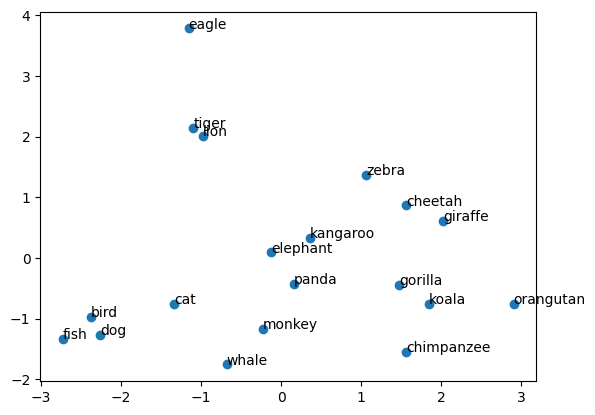

In [33]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

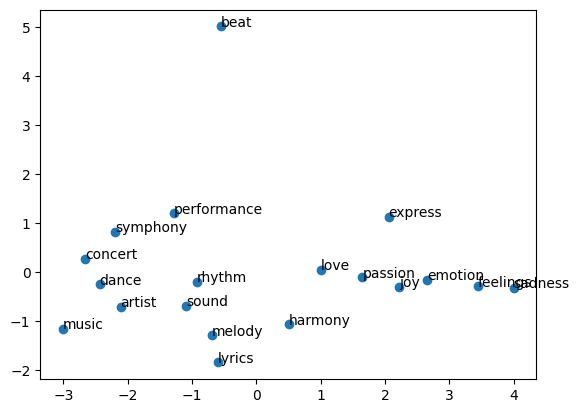

In [32]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.

#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words = ["music", "emotion", "joy", "sadness", "harmony", "rhythm", "melody", "dance", "beat", "feelings", "sound", "lyrics", "concert", "artist", "love", "passion", "express", "symphony", "performance"]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()


In [10]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")


[==================================================] 100.0% 387.1/387.1MB downloaded


In [11]:
dog = twitter_model['music']

# Getting the most similar words

print(twitter_model.most_similar('music'))

# Getting the similarity between two words

print(twitter_model.similarity('music', 'emotion'))

[('songs', 0.8101051449775696), ('listen', 0.8021098375320435), ('song', 0.8002786636352539), ('listening', 0.7687085866928101), ('album', 0.7600036263465881), ('radio', 0.745887815952301), ('rap', 0.7388442158699036), ('tune', 0.7313328385353088), ('tunes', 0.731234610080719), ('track', 0.7272573113441467)]
0.379822


In [12]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
emotion = twitter_model["joy"]-twitter_model['emotion']

music_emotion=twitter_model["music"]+emotion

print(twitter_model.most_similar(music_emotion))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=twitter_model["feelings"]-model["feeling"]

print(twitter_model.most_similar(plural))

#we can also add vectors together
plural_music=twitter_model["music"]+plural

print(twitter_model.most_similar(plural_music))



[('music', 0.7919555306434631), ('dj', 0.678919792175293), ('presents', 0.6748198866844177), ('christmas', 0.6538308262825012), ('listen', 0.6453619003295898), ('listening', 0.6443890929222107), ('rock', 0.6389746069908142), ('singing', 0.6309806704521179), ('live', 0.6303812265396118), ('day', 0.6284649968147278)]
[('feelings', 0.7725552916526794), ('feeling', 0.6718760132789612), ('feel', 0.6717643737792969), ('ones', 0.666449248790741), ('anymore', 0.6631757020950317), ('reason', 0.6501678228378296), ('knowing', 0.6296671628952026), ('emotions', 0.6264134049415588), ('sometimes', 0.6237381100654602), ('cause', 0.6232033371925354)]
[('music', 0.7711101770401001), ('feel', 0.7553295493125916), ('life', 0.754574716091156), ('feelings', 0.7395375370979309), ('songs', 0.7311215996742249), ('reason', 0.7250743508338928), ('feeling', 0.7244986295700073), ('mind', 0.7211028933525085), ('ones', 0.7180327773094177), ('anymore', 0.7154048085212708)]


In [13]:

gender=twitter_model["woman"]-twitter_model["man"]

print(twitter_model.most_similar(gender))
print(twitter_model.most_similar(-gender))

twitter_model.most_similar(twitter_model["doctor"]+gender)



[('voluptuous', 0.5117579698562622), ('curvaceous', 0.48355618119239807), ('wantsnnconcert', 0.4729609191417694), ('عِند', 0.44581761956214905), ('للارهاب', 0.43309929966926575), ('нбу', 0.4327424168586731), ('bewitching', 0.42820292711257935), ('sıkıntıyla', 0.42625296115875244), ('عزّة', 0.42567387223243713), ('фракция', 0.42432162165641785)]
[('ja', 0.6039456129074097), ('jaa', 0.556858241558075), ('kom', 0.5307627320289612), ('vart', 0.5241010189056396), ('nou', 0.5232191681861877), ('nen', 0.5068222284317017), ('dom', 0.5030682682991028), ('ej', 0.5018608570098877), ('daar', 0.4968878924846649), ('nee', 0.4965398907661438)]


[('doctor', 0.7607352137565613),
 ('doctors', 0.6295557022094727),
 ('woman', 0.6148408651351929),
 ('mother', 0.5837641954421997),
 ('dentist', 0.5674720406532288),
 ('midwife', 0.5643957257270813),
 ('birth', 0.5590447187423706),
 ('grandmother', 0.5517832040786743),
 ('nurse', 0.5417730212211609),
 ('librarian', 0.5328162312507629)]

In [ ]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?

#Some of the words altogehther disappeared from the embedding space, while others have changed their proximity to other words. This is a result of a the new model being trained on different types of texts, showcasing different relationships between words in Twitter.

Part 3: Embedding reddit posts

In [15]:
import pandas as pd

In [16]:
#read in uiuc csv

uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])




In [17]:
#using the code from project 1, clean the text and create a bag of words representation of the text
!python -m spacy download en_core_web_sm



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 7.8 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [26]:
import spacy
languagemodel = spacy.load("en_core_web_sm")

def lemmatize(text):
    doc = languagemodel(text)  # Use the correct variable name here
    tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]  # Use .lemma_ instead of .lemma for the lemma
    return ' '.join(tokens)

def clean(text):
    # Remove newline and extra space characters
    text = ' '.join(text.split())
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

# Assuming 'data' is a DataFrame with a 'text' column
data['cleaned_text'] = data['text'].apply(clean)
data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize)

In [27]:
vectorizer = CountVectorizer(min_df=3, max_df=0.3, ngram_range=(1,2))
bag_of_words = vectorizer.fit_transform(data['lemmatized_text'])
#using the embedding code from last week, plot a pca of all posts in the subreddits data set
from sklearn.decomposition import PCA


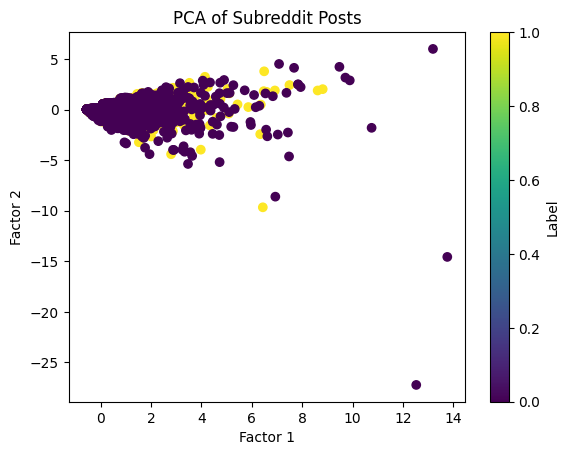

In [34]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(bag_of_words.toarray())

# Plot the PCA with color-coded labels
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['label'], cmap='viridis')
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('PCA of Subreddit Posts')
plt.colorbar(label='Label')
plt.show()


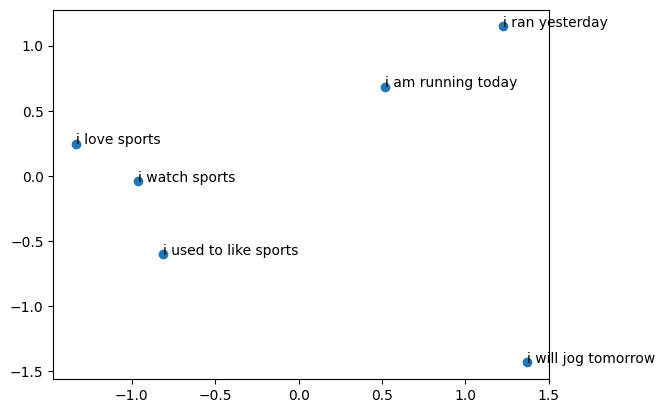

In [35]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i watch sports", "i love sports", "i used to like sports"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

/opt/anaconda3/envs/is310/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/envs/is310/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/var/folders/kx/s_3h46ln6jb7ww56xmh6vlx40000gn/T/ipykernel_11159/1432293556.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], cmap='viridis')


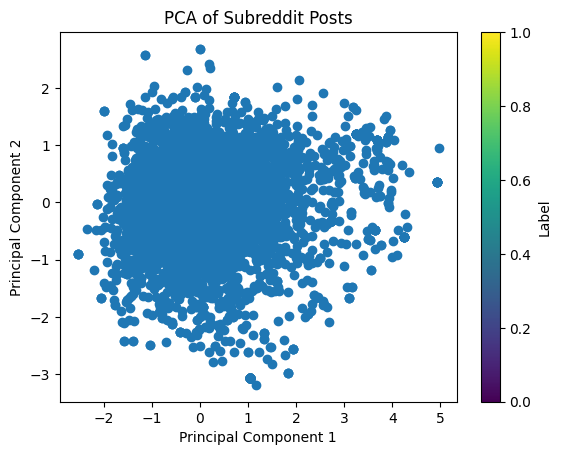

In [36]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 

average_embeddings = [avg_embedding(post, model) for post in data['lemmatized_text']]

valid_embeddings = [embedding for embedding in average_embeddings if embedding.shape == (100,)]

embedding_array = np.array(valid_embeddings)

pca_model = PCA(n_components=2)
reduced_embeddings = pca_model.fit_transform(embedding_array)

plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Subreddit Posts')
plt.colorbar(label='Label')
plt.show()

Part 4: HuggingFace and BERT

In [37]:
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 6.6 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 7.9 MB/s eta 0:00:00a 0:00:01


In [100]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

c:\Users\lucia\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\lucia\.cache\huggingface\hub\models--finiteautomata--bertweet-base-sentiment-analysis. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [101]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [ ]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label

In [ ]:
#look at ten sample posts and labels; do you agree with all of them? 

In [ ]:
#is the UIUC or Michigan subreddit more negative?